<a href="https://colab.research.google.com/github/CrisBelDev/Notebook_Est2/blob/main/notebook_est2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capitulo 10: **Inferencia estadística de medias y proporciones con 2 poblaciones**

## Inferencias acerca de la diferencia entre dos medias poblacionales: ($\sigma_1$ y $\sigma_2$ conocidas)

- Sean $\sigma_1$ y $\sigma_2$ las medias poblacionales a estudiar.
- La inferencia se realiza sobre la diferencia de las medias $\mu_1 - \mu_2$.
- Se toma un tamaño de muestra para cada población (muestra aleatoria simple e independiente) $n_1$ y $n_2$ respectivamente.
- Suponga que $\sigma_1$ y $\sigma_2$ son conocidas.

Las medias poblacionales son teóricas. En la práctica se calculan las medias muestrales $\bar{x_1}$ y $\bar{x_2}$.

### **estimador puntual** de la diferencia de dos medias poblacionales:


  $$ \bar{x_1} - \bar{x_2} $$

### $\textbf{Error estandar}$ del estimador puntual:


$$\sigma_{\bar{x}_1 - \bar{x}_2} = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$$

### Estimacion por intervalo de la diferencia entre dos medias poblacionales con $\sigma_1$, $\sigma_2$ conocidas:

$$\text{Margen de error} = z_{\alpha/2} \sigma_{\bar{x}_1 - \bar{x}_2} = z_{\alpha/2} \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$$

### Estimación por intervalo de la diferencia entre dos medias poblacionales: $\sigma_1$ Y $\sigma_2$ conocidas:


  $$\bar{x}_1 - \bar{x}_2 \pm z_{\alpha/2} \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$$
  - donde 1 - $\alpha/2$ es el coeficiente de confianza.

### Pruebas de hipótesis

$$ H_0 : \mu_1 - \mu_2 \geq D_0 \quad H_0: \mu_1 - \mu_2\leq D_0 \quad H_0: \mu_1 - \mu_2 = D_0$$
$$ H_a : \mu_1 - \mu_2 < D_0 \quad H_a: \mu_1 - \mu_2 > D_0 \quad H_a: \mu_1 - \mu_2 \neq D_0$$

Ejercicio:

1. Los resultados siguientes provienen de muestras aleatorias simples independientes tomadas de dos poblaciones.

| Muestra 1 | Muestra 2 |
|-----------|-----------|
| n1 = 50   | n2 = 35   |
| x̄1 = 13.6 | x̄2 = 11.6 |
| s1 = 2.2  | s2 = 3.0  |


a) ¿Cuál es la estimación puntual de la diferencia entre las dos medias poblacionales?

In [1]:
# Datos de las muestras
n1, x_bar1, s1 = 50, 13.6, 2.2
n2, x_bar2, s2 = 35, 11.6, 3.0

# Estimación puntual de la diferencia de medias
point_estimate = x_bar1 - x_bar2
print(f"Estimación puntual (a): {point_estimate}")


Estimación puntual (a): 2.0


b) Proporcione un intervalo de 90% de confianza para la diferencia entre las dos medias poblacionales.

Intervalo de confianza del 90% (b): (1.00572019113286, 2.99427980886714)


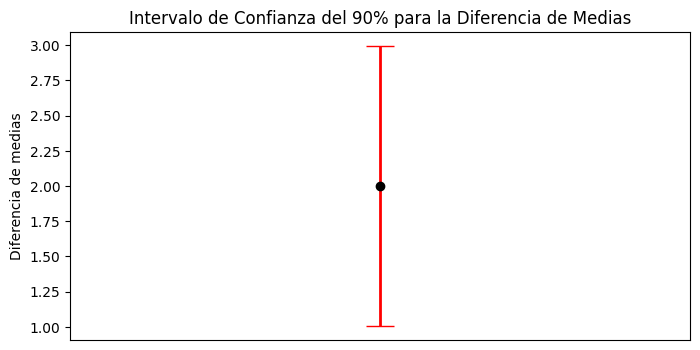

In [16]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos de las muestras
n1, x_bar1, s1 = 50, 13.6, 2.2
n2, x_bar2, s2 = 35, 11.6, 3.0

# Estimación puntual de la diferencia de medias
point_estimate = x_bar1 - x_bar2

# Error estándar de la diferencia de medias
se_diff = np.sqrt((s1**2 / n1) + (s2**2 / n2))

# Función para calcular el valor crítico t
def t_critical_value(confidence_level, df):
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, df)
    return t_critical

# Grados de libertad
df = ((s1**2/n1 + s2**2/n2)**2) / (((s1**2/n1)**2)/(n1-1) + ((s2**2/n2)**2)/(n2-1))

# Valor crítico t para el nivel de confianza del 90%
t_critical_90 = t_critical_value(0.90, df)

# Margen de error para el intervalo de confianza del 90%
margin_error_90 = t_critical_90 * se_diff

# Calcular el intervalo de confianza del 90%
ci_90_lower = point_estimate - margin_error_90
ci_90_upper = point_estimate + margin_error_90

# Resultado
ci_90 = (ci_90_lower, ci_90_upper)
print(f"Intervalo de confianza del 90% (b): {ci_90}")

# Graficar el intervalo de confianza del 90%

# Configurar el estilo de la gráfica
#plt.style.use('seaborn-darkgrid')

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 4))

# Estimación puntual y barras de error
ax.errorbar(1, point_estimate, yerr=[[point_estimate - ci_90_lower], [ci_90_upper - point_estimate]], 
            fmt='o', color='black', ecolor='red', capsize=10, elinewidth=2)

# Título y etiquetas
ax.set_title('Intervalo de Confianza del 90% para la Diferencia de Medias')
ax.set_ylabel('Diferencia de medias')
ax.set_xticks([])
ax.set_xticklabels([])

# Eliminar marcas del eje x
#ax.xaxis.set_ticks_position('none') 

# Mostrar la gráfica
plt.show()



c) Proporcione un intervalo de 95% de confianza para la diferencia entre las dos medias poblacionales.

In [17]:
# Valor crítico t para el nivel de confianza del 95%
t_critical_95 = t_critical_value(0.95, df)

# Margen de error para el intervalo de confianza del 95%
margin_error_95 = t_critical_95 * se_diff

# Calcular el intervalo de confianza del 95%
ci_95_lower = point_estimate - margin_error_95
ci_95_upper = point_estimate + margin_error_95

# Resultado
ci_95 = (ci_95_lower, ci_95_upper)
print(f"Intervalo de confianza del 95% (c): {ci_95}")


Intervalo de confianza del 95% (c): (0.8093969654052469, 3.190603034594753)
